In [150]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [151]:
tennis_data <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
tennis_data

ERROR: Error in open.connection(con, "rb"): HTTP error 403.


Splitting into training and testing data

In [149]:
set.seed(42) 
tennis_split <- initial_split(tennis_data, prop = 0.75, strata = winner_id)  
tennis_train <- training(tennis_split)
tennis_train
tennis_test <- testing(tennis_split)
tennis_test

X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2881,2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,⋯,54,42,22,15,11,15,6,3650,8,2975
2884,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,4,105676,NA,⋯,54,44,13,14,7,10,7,3775,15,2320
2885,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,5,106298,NA,⋯,53,29,11,11,4,11,18,2235,76,667


X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2879,2017-0605,Tour Finals,Hard,8,F,20171113,298,105676,7.0,⋯,47,35,17,13,1,3,8,2975,2,9005
2882,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NA,⋯,53,33,21,14,6,11,7,3775,18,2235
2883,2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,⋯,54,30,12,12,5,11,15,2320,76,667


### Average Variables

In [148]:
tennis_avg_summarization <- tennis_train %>% 
    select(winner_ht, winner_age, loser_ht, loser_age) %>% 
    summarize(avg_win_height = mean(winner_ht, na.rm = TRUE),
              avg_win_age = mean(winner_age, na.rm = TRUE), 
              avg_loser_height = mean(loser_ht, na.rm = TRUE), 
              avg_loser_age = mean(loser_age, na.rm = TRUE))

tennis_avg_summarization

avg_win_height,avg_win_age,avg_loser_height,avg_loser_age
<dbl>,<dbl>,<dbl>,<dbl>
186.6186,27.68964,186.2844,27.46914


### Number of Winners per Hand

In [147]:
tennis_num_winners_hand <- tennis_train %>% 
    select(winner_hand) %>% 
    group_by(winner_hand) %>% 
    summarize(number_winners = n())

tennis_num_winners_hand

`summarise()` ungrouping output (override with `.groups` argument)



winner_hand,number_winners
<chr>,<int>
L,740
R,4368
U,43


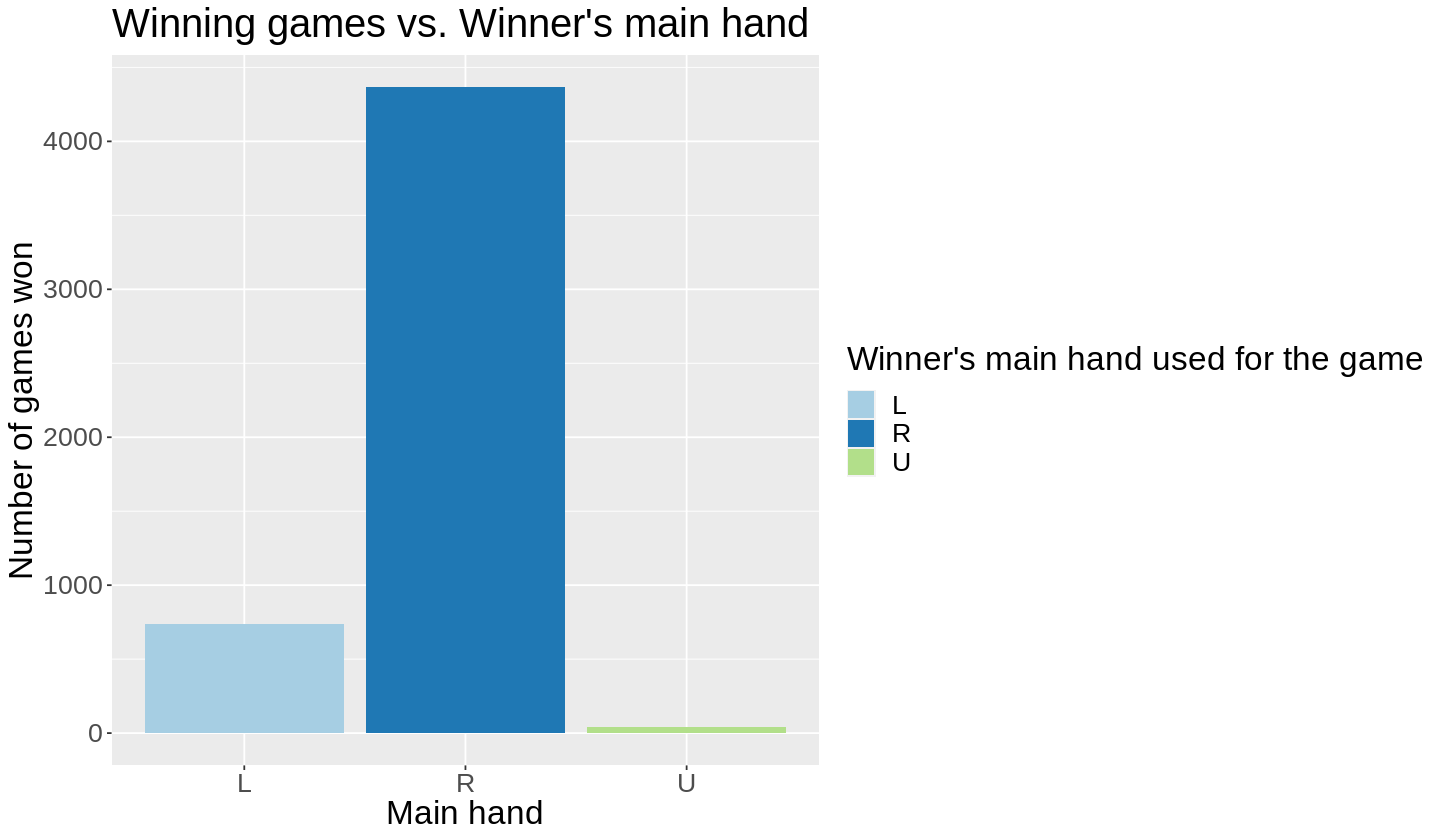

In [162]:
options(repr.plot.height = 7, repr.plot.width = 12)
library(RColorBrewer)
#display.brewer.all()
# display.brewer.all(colorblindFriendly = T)

winning_hand_visual <- ggplot(tennis_num_winners_hand, aes(x = winner_hand, y = number_winners, fill = winner_hand)) +
                            geom_bar(stat = "identity") +
                            labs(x = "Main hand", y = "Number of games won", fill = "Winner's main hand used for the game") +
                            ggtitle("Winning games vs. Winner's main hand") +
                            theme(text = element_text(size = 20)) +
                            scale_fill_brewer(palette = 'Paired')

winning_hand_visual



Warning message:
“Removed 1640 rows containing non-finite values (stat_bin).”


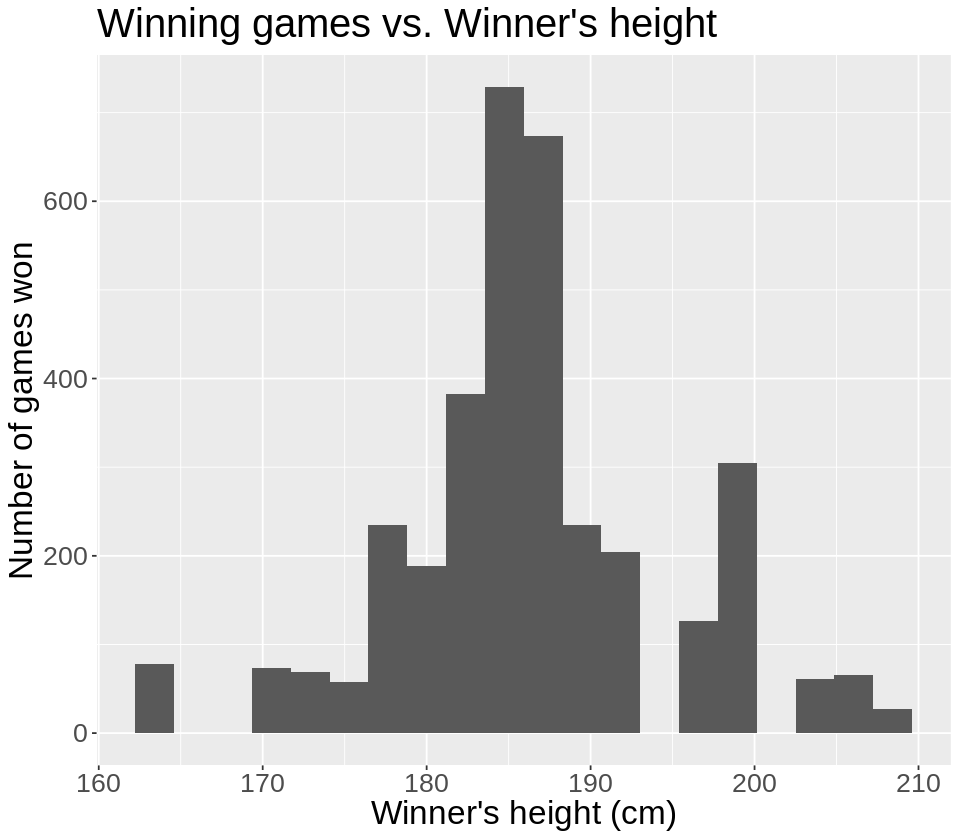

In [160]:
options(repr.plot.height = 7, repr.plot.width = 8)
winning_height_visual <- tennis_train %>%
                    ggplot(aes(x = winner_ht)) +
                    geom_histogram(bins = 20) +
                    labs(x = "Winner's height (cm)", y = "Number of games won") +
                    ggtitle("Winning games vs. Winner's height") +
                    theme(text = element_text(size = 20))
                    

winning_height_visual


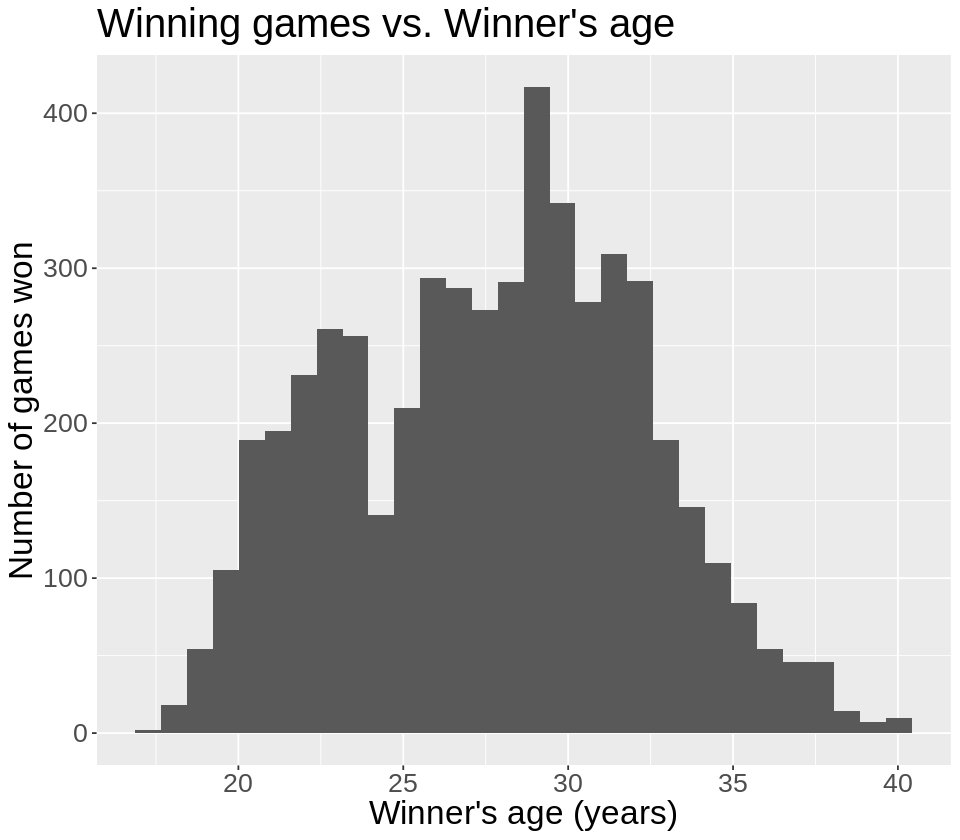

In [161]:
options(repr.plot.height = 7, repr.plot.width = 8)
winning_age_visual <- tennis_train %>%
                    ggplot(aes(x = winner_age)) +
                    geom_histogram(bins = 30) +
                    labs(x = "Winner's age (years)", y = "Number of games won") +
                    ggtitle("Winning games vs. Winner's age") +
                    theme(text = element_text(size = 20))
                    

winning_age_visual
